# Youtube Trending Data: Market Analysis
The dataset includes videos that have been "trending" on youtube in the specified countries within a specified time

In [197]:
# Created by Matilda Eriksson at 2021-01-27
# Data source: https://www.kaggle.com/datasnaek/youtube-new

<b>This report is made for a (fictional) client who teaches math on YouTube. The goal is to explore the current market of YouTube Education and gather relevant insights based on the dataset given. The "client" teaches his classes in English and I have therefore chosen to look at the available english speaking countries data. </b>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
ca = pd.read_csv('CAvideos.csv')
gb = pd.read_csv('GBvideos.csv')
us = pd.read_csv('USvideos.csv')

In [3]:
# Convert time data
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format='%y.%d.%m')

gb['publish_time'] = pd.to_datetime(gb['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format='%y.%d.%m')

us['publish_time'] = pd.to_datetime(us['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us['trending_date'] = pd.to_datetime(us['trending_date'], format='%y.%d.%m')

In [4]:
# Add country labels 
ca['country'] = 'CA'
gb['country'] = 'GB'
us['country'] = 'US'

In [5]:
# Concatenate dataframes
df1 = pd.concat([ca, gb, us])

In [6]:
# Add year and month column for future analysis
df1['year'] = pd.DatetimeIndex(df1['publish_time']).year
df1['month'] = pd.DatetimeIndex(df1['publish_time']).month

In [7]:
# Inspect the DataFrame
df1.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120746 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                120746 non-null  object        
 1   trending_date           120746 non-null  datetime64[ns]
 2   title                   120746 non-null  object        
 3   channel_title           120746 non-null  object        
 4   category_id             120746 non-null  int64         
 5   publish_time            120746 non-null  datetime64[ns]
 6   tags                    120746 non-null  object        
 7   views                   120746 non-null  int64         
 8   likes                   120746 non-null  int64         
 9   dislikes                120746 non-null  int64         
 10  comment_count           120746 non-null  int64         
 11  thumbnail_link          120746 non-null  object        
 12  comments_disabled       120746 

In [8]:
# Investigate what time range to pick for the analysis
df1.groupby('year').video_id.agg('count')

year
2006        1
2007       37
2008       59
2009       28
2010       56
2011      112
2012       39
2013      115
2014      104
2015      135
2016      106
2017    31365
2018    88589
Name: video_id, dtype: int64

<b>I chose to do my analysis over a six month period during 2018. 
I would have prefered a whole year but chose this due to lack of data. I estimate that the amount of data is enough for this brief level of analysis though.</b>

In [9]:
df = df1[df1['year'] == 2018].reset_index(drop=True)

In [10]:
# Adding comments ratio for later analysis
df['comments_ratio'] = 100 * df['comment_count'] / df['views']
df['comments_ratio'] = np.round(df.comments_ratio, 2)

In [11]:
# Adding timedelta for later analysis
df['time_until_trending'] = (df['trending_date'] - df['publish_time']).dt.round(freq='D')

In [209]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,year,month,comments_ratio,time_until_trending
0,21EJMIdK1_g,2018-01-01,London Fireworks 2018 LIVE - New Year's Eve Fi...,BBC,24,2018-01-01 00:21:00,"BBC|""fireworks""|""NYE""|""new year""|""countdown""|""...",475127,8079,224,...,https://i.ytimg.com/vi/21EJMIdK1_g/default.jpg,False,False,False,Programme website: http://bbc.in/2BsMv4k Count...,CA,2018,1,0.17,0 days
1,WuV_KvK9Tqk,2018-01-01,New Year 2018: celebrations around the world,The Telegraph,25,2018-01-01 00:54:56,"Telegraph|""News""|""World News""|""UK Newspaper""|""...",65997,522,20,...,https://i.ytimg.com/vi/WuV_KvK9Tqk/default.jpg,False,False,False,The world welcomes the start of a new year as ...,CA,2018,1,0.06,0 days
2,KtwVjaO8CwM,2018-01-01,London New Year's Eve 2018 - Fireworks From Lo...,BrioTV,17,2018-01-01 00:38:41,[none],84662,653,41,...,https://i.ytimg.com/vi/KtwVjaO8CwM/default.jpg,False,False,False,LONDON welcomes in 2018 with stunning FIREWORK...,CA,2018,1,0.10,0 days
3,HsscqYIznPo,2018-01-01,Why I'm Deleting SkyDoesMinecraft (Midnight HST),Sky Did Minecraft,24,2018-01-01 02:46:58,"Gaming|""Minecraft""|""SkyDoesMinecraft""|""Quittin...",193053,21294,2596,...,https://i.ytimg.com/vi/HsscqYIznPo/default.jpg,False,False,False,"I put the wrong time in the video, midnight HS...",CA,2018,1,30.05,0 days
4,w9wFRvhme5c,2018-01-01,Atlantic Stream - Canada's New Years Eve: Coun...,CBC,24,2018-01-01 04:09:46,"New Years eve|""New Years eve 2018""|""New Years ...",33637,116,14,...,https://i.ytimg.com/vi/w9wFRvhme5c/default.jpg,False,False,False,"As Canada counts down to 2018, CBC brings Cana...",CA,2018,1,0.03,0 days


In [12]:
# Check for duplicates
is_duplicate = df.duplicated(subset='video_id')
duplicated_values = df[is_duplicate].sort_values(by=['video_id', 'views', ])

<b>There seems to be duplicate rows for video_id's that have several trending_date's. 
Depending on what I would like to know, I will have to remove duplicates based on different conditions.

For a bar plot showing total trending video_is's per category, my result is not impacted by what row I choose to keep. I will keep the unique video_id's with the latest trending date since I will use that later. </b>

In [13]:
df_unique_last = df.sort_values(by=['video_id','trending_date'], ascending=True).reset_index(drop=True)
df_unique_last.drop_duplicates(subset='video_id', keep='last', inplace=True)

In [28]:
top_categories = df_unique_last.groupby('category_id', as_index=False).video_id.count().reset_index(drop=True)
top_categories.sort_values(by='video_id', ascending=False, inplace=True)
#top_categories

<b>When investigation this dataset and also looking at YouTube, I found that not all big math teaching channels are under the 'Education' category. Some of them goes under the category 'Science & Technology'. I will therefore include both of these categories when making category specific analysis.</b>

<Figure size 432x288 with 0 Axes>

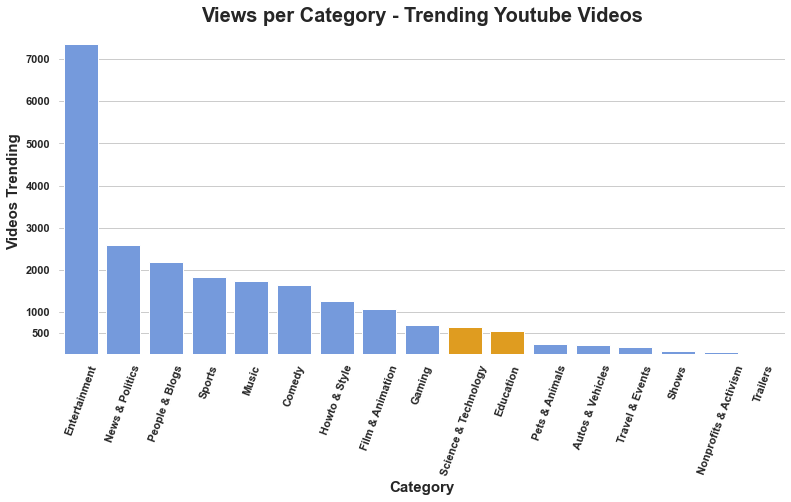

In [22]:
# A summary of Educations proportion on YT
plt.clf()
fig, ax = plt.subplots(figsize=(13,6))
sns.set_theme(style="whitegrid")
clrs = ['orange' if (x == 27 or x == 28) else 'cornflowerblue' for x in top_categories.category_id]
fig = sns.barplot(x='category_id', y="video_id", data=top_categories,
            ci=None, palette=clrs, order=top_categories['category_id'])


#plt.yscale('log')
plt.xticks(ticks=np.arange(0,17), labels=['Entertainment', 'News & Politics',
                                          'People & Blogs', 'Sports', 'Music',
                                          'Comedy', 'Howto & Style', 'Film & Animation',
                                          'Gaming', 'Science & Technology', 'Education', 'Pets & Animals',
                                          'Autos & Vehicles', 'Travel & Events', 'Shows',
                                          'Nonprofits & Activism', 'Trailers']
           , rotation=70, size=11, weight='demi')
ax.set_xlabel('Category', size=15, weight='bold')
ax.set_ylabel('Videos Trending', size=15, weight='bold')

plt.yticks(ticks = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000],
           labels=['500', '1000', '2000', '3000', '4000', '5000', '6000', '7000'], weight='demi')
ax.set_title('Views per Category - Trending Youtube Videos', size=20, weight='bold')
sns.despine(left=True, bottom=True, right=True)
#plt.savefig('temp.png', transparent=True, bbox_inches='tight')
plt.show()

<b>I'd like to know if videos within our categories of interest receive more or less comments than the other categories.</b>

In [24]:
mean_comments_ratio = df_unique_last.groupby('category_id', as_index=False).comments_ratio.agg(np.mean).reset_index(drop=True)
mean_comments_ratio.sort_values(by='comments_ratio', ascending=False, inplace=True)

In [25]:
mean_comments_ratio_all = 100 * np.mean(df_unique_last['comment_count'] / df_unique_last['views'])
mean_comments_ratio_all

0.5044956902855727

<Figure size 432x288 with 0 Axes>

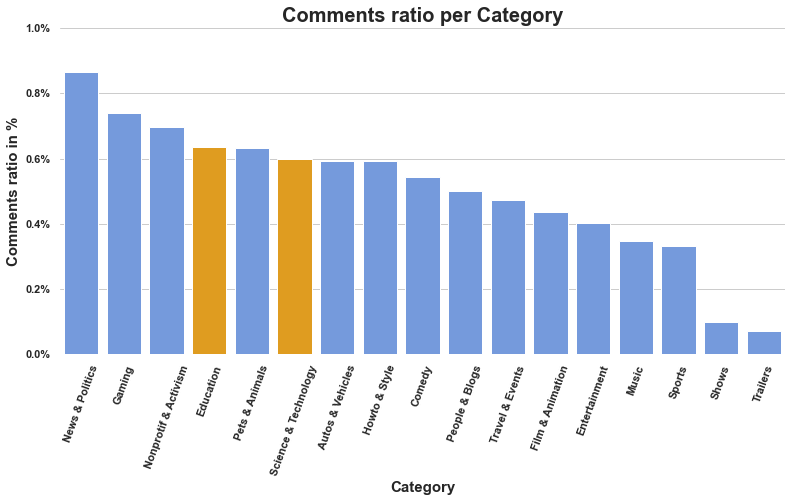

In [26]:
# Plot comments ratio per category
import matplotlib.ticker as mtick
plt.clf()
fig, ax = plt.subplots(figsize=(13,6))
sns.set_theme(style="whitegrid")
clrs = ['orange' if (x == 27 or x == 28) else 'cornflowerblue' for x in mean_comments_ratio.category_id]
fig = sns.barplot(x='category_id', y="comments_ratio", data=mean_comments_ratio,
            ci=None, palette=clrs, order=mean_comments_ratio['category_id'])

ax.set_xlabel('Category', size=15, weight='bold')
ax.set_ylabel('Comments ratio in %', size=15, weight='bold')
plt.yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0],
           labels=['0.0%', '0.2%', '0.4%', '0.6%', '0.8%', '1.0%'], weight='demi')
ax.set_title('Comments ratio per Category', size=20, weight='bold')

plt.xticks(ticks=np.arange(0,17), labels=['News & Politics', 'Gaming', 'Nonprotif & Activism',
                                          'Education', 'Pets & Animals', 'Science & Technology',
                                          'Autos & Vehicles', 'Howto & Style', 'Comedy', 'People & Blogs',
                                          'Travel & Events', 'Film & Animation', 'Entertainment',  
                                          'Music', 'Sports', 'Shows', 'Trailers'],
           rotation=70, size=11, weight='demi')
sns.despine(left=True, bottom=True, right=True)
#plt.savefig('temp2.png', transparent=True, bbox_inches='tight')
plt.show()

<b>Time for some insights about our specified categories of interest: Education and Science & Technology</b>

In [27]:
df_education = df[df['category_id'].isin([27, 28])].reset_index(drop=True)
df_education.sort_values(by=['video_id', 'trending_date'], inplace=True)
df_education.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,year,month,comments_ratio,time_until_trending
382,-0DjA_r32uQ,2018-02-14,2.12 - Q & Current Event Analysis from Feb 11t...,Destroying the Illusion,27,2018-02-12 23:44:59,"jordan sather|""destroying the illusion""|""qanon...",57494,2190,62,...,https://i.ytimg.com/vi/-0DjA_r32uQ/default.jpg,False,False,False,Find me on:\nhttp://www.destroyingtheillusion....,CA,2018,2,1.34,1 days
1049,-0Rj7qcLu1A,2018-04-25,The moment Jordan Peterson asked a hard questi...,Mind Temple,27,2018-04-24 05:06:55,"2018|""Jordan peterson""|""jordan peterson cathy ...",507781,5224,1169,...,https://i.ytimg.com/vi/-0Rj7qcLu1A/default.jpg,False,False,False,NEW MERCH UP (Peterson Sorting Hat) Spread the...,CA,2018,4,1.35,1 days
3775,-4s2MeUgduo,2018-03-22,The Weirdest Mystery Tech Yet...,Austin Evans,28,2018-03-20 15:44:52,"tech|""unboxing""|""gadget""|""mystery tech""|""lamar...",296237,38776,466,...,https://i.ytimg.com/vi/-4s2MeUgduo/default.jpg,False,False,False,From a KFC phone to a gadget that brings pain ...,US,2018,3,0.45,1 days
3795,-4s2MeUgduo,2018-03-23,The Weirdest Mystery Tech Yet...,Austin Evans,28,2018-03-20 15:44:52,"tech|""unboxing""|""gadget""|""mystery tech""|""lamar...",334239,41522,533,...,https://i.ytimg.com/vi/-4s2MeUgduo/default.jpg,False,False,False,From a KFC phone to a gadget that brings pain ...,US,2018,3,0.44,2 days
3815,-4s2MeUgduo,2018-03-24,The Weirdest Mystery Tech Yet...,Austin Evans,28,2018-03-20 15:44:52,"tech|""unboxing""|""gadget""|""mystery tech""|""lamar...",353132,43036,563,...,https://i.ytimg.com/vi/-4s2MeUgduo/default.jpg,False,False,False,From a KFC phone to a gadget that brings pain ...,US,2018,3,0.37,3 days


<b>I'd like to know, in average, how long time it takes from a video being uploaded until it starts trending. I'm only interested in our specific categories. 

To find this, I will remove duplicates and keep the earliest trending_date.</b>

In [35]:
df_education_last = df_education.drop_duplicates(subset='video_id', keep='first').reset_index(drop=True)
t_time = df_education_last.agg({'time_until_trending': np.mean}, as_index=False).dt.round(freq='H')
tt_time = t_time.dt.components['hours']

print('''For categories 'Education' and 'Science & Technology',
the average time from upload to trending is ''' + str(tt_time[0]) + ' hours.')

For categories 'Education' and 'Science & Technology',
the average time from upload to trending is 18 hours.


In [36]:
videos = df_education_last.video_id.count()
print('There were ' + str(videos) + ' videos within Education and Science & Technology trending between June-Dec 2018')

There were 1192 videos within Education and Science & Technology trending between June-Dec 2018


<b>I'd also like to know the averagetrend duration. I will merge the above DataFrame with a DataFrame containing the latest trending_date.</b>

In [37]:
latest_trending_date = df_education[['video_id', 'trending_date']].reset_index(drop=True)
latest_trending_date.drop_duplicates(subset='video_id', keep='last', inplace=True)

In [38]:
trending_duration = df_education_last.merge(latest_trending_date, how='left', on='video_id', suffixes=['_first', '_last']).reset_index(drop=True)

In [39]:
trending_duration['trend_duration'] = trending_duration['trending_date_last'] - trending_duration['trending_date_first']

In [40]:
t_duration = trending_duration.agg({'trend_duration': np.mean}, as_index=False).dt.round(freq='H')
tt_duration_hours = t_duration.dt.components['hours']
tt_duration_days = t_duration.dt.components['days']
print('''For categories 'Education' and 'Science & Technology',
the average trending duration is ''' + str(tt_duration_days[0]) + ' days and '+ str(tt_duration_hours[0]) + ' hours')

For categories 'Education' and 'Science & Technology',
the average trending duration is 3 days and 3 hours


<b>Let's find out if there's correlation between comments ratio and views</b>

In [42]:
x=df_education.comments_ratio
y=df_education.views

<Figure size 432x288 with 0 Axes>

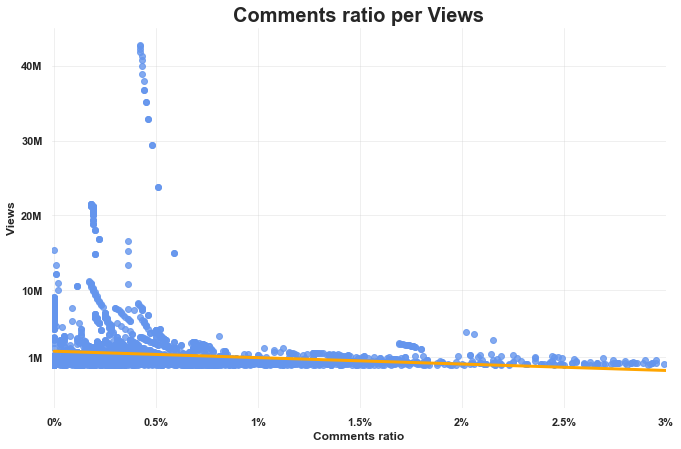

In [46]:
plt.clf()
fig, ax = plt.subplots(figsize=(11,7))
sns.set_theme(style="whitegrid")
fig = sns.regplot(x=x, y=y, ci=None, color='cornflowerblue', scatter_kws=({'alpha':0.8})
                  , line_kws={'color':'orange', 'lw':3})
sns.despine(left=True, bottom=True, right=True)
plt.ticklabel_format(style = 'plain')
ax.set_xlabel('Comments ratio', size=12, weight='bold')
ax.set_ylabel('Views', size=12, weight='bold')
ax.set_title('Comments ratio per Views', size=20, weight='bold')
plt.yticks(ticks = [1000000, 10000000, 20000000, 30000000, 40000000],
           labels=['1M', '10M', '20M', '30M', '40M'], weight='demi')
plt.xticks(ticks = [0, 0.5, 1, 1.5, 2, 2.5, 3],
           labels=['0%', '0.5%', '1%', '1.5%', '2%', '2.5%', '3%'], weight='demi')
plt.xlim(-0.01,3)
ax.grid(b=True, axis='both',alpha=0.3)
#plt.savefig('temp3.png', transparent=True, bbox_inches='tight')
plt.show()

My conclusion is that more comments does not give you more views. However what we don't know from this dataset is if more comments makes you more likely to become trending, which in it self might give more views! This dataset only contains videos that are trending, so we can't compare that.

<b> I would like to see the most viewed channels within my categories </b>

In [49]:
top_channels = df_education.groupby('channel_title').views.sum().sort_values(ascending=False).reset_index().head(10)
top_channels

,channel_title,views
0,SpaceX,1165102192
1,AsapSCIENCE,866460834
2,BostonDynamics,502286010
3,Apple,442083416
4,Kurzgesagt – In a Nutshell,355357876
5,"Tyler, The Creator",338243833
6,Unbox Therapy,319395361
7,Marques Brownlee,202047370
8,Linus Tech Tips,178041629
9,CrazyRussianHacker,177922606


<b> .. And also the most popular tag words! Is math in there?</b>

In [53]:
df_education_latestvalue = df_education.drop_duplicates(subset='video_id', keep='last').reset_index(drop=True)
tag_words = df_education_latestvalue.tags.str.split(pat='|', expand=True).stack().value_counts().reset_index()

In [54]:
tag_words.head(5)

,index,0
0,"""science""",221
1,"""education""",134
2,"""technology""",117
3,"""space""",86
4,"""learn""",81


In [55]:
tag_words[tag_words['index'] == '''"math"''']

,index,0
164,"""math""",12
